# Data Exploration

### Charging libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
if not Path("data/raw/archive").exists():
    os.chdir("..")

print("Working directory:", os.getcwd())

Working directory: c:\Users\palom\Desktop\assigment-ai-ARIADNA-20251113\source-code-ai-ARIADNA-20251113


In [3]:
#Setting up (relative) paths
train_dir = Path("data/raw/archive/train")
good_dir = train_dir / "good"
not_good_dir = train_dir / "not-good"
test_dir = Path("data/raw/archive/test")

### How many samples do we have?

In [4]:
num_good = len(list(good_dir.glob("*")))
num_not_good = len(list(not_good_dir.glob("*")))
num_test = len(list(test_dir.glob("*")))

In [5]:
print(f"Training samples total: {num_good+num_not_good}")
print(f"    - Good samples: {num_good}")
print(f"    - Not-good samples: {num_not_good}")
print(f"Test samples: {num_test}")

Training samples total: 300
    - Good samples: 250
    - Not-good samples: 50
Test samples: 180


### Are samples evenly distributed?

Not realy, we have 5 times more good samples than bad ones. But we have more training samples than test samples which is a good start.

In [12]:
out_dir = Path.cwd() / "figs"
out_dir.mkdir(parents=True, exist_ok=True)

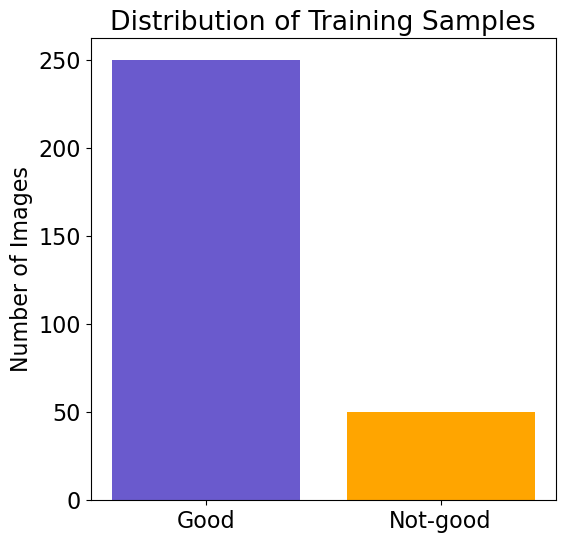

In [13]:
labels = ['Good', 'Not-good']
counts = [num_good, num_not_good]
colors = ['#6a5acd', 'orange']

plt.figure(figsize=(6,6))
plt.bar(labels, counts, color=colors)
plt.title("Distribution of Training Samples")
plt.ylabel("Number of Images")
plt.rcParams["font.size"] = 16
plt.savefig(out_dir / "trainingDistributionBars.pdf", format="pdf", bbox_inches="tight")
plt.show()

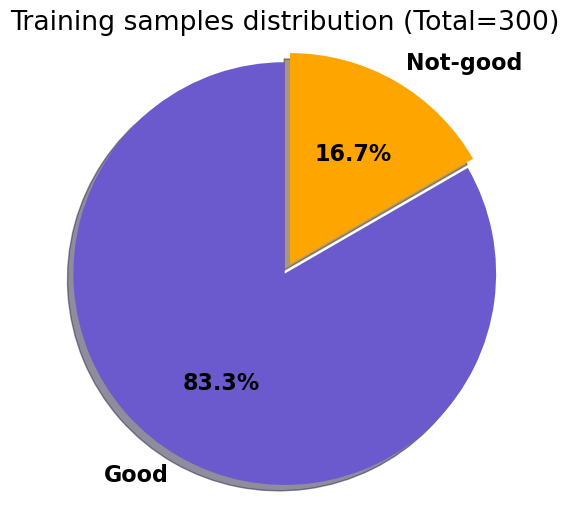

In [14]:
plt.figure(figsize=(6,6))
plt.pie(counts,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',   # show percentages
        startangle=90,
        explode=(0.05,0),
        shadow=True,
        textprops={'fontsize': 16, 'weight': 'bold'}  # increase number size here
)
plt.rcParams["font.size"] = 16
plt.title("Training samples distribution (Total={})".format(num_good+num_not_good))
plt.axis('equal')
plt.savefig(out_dir / "trainingDistributionPie.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Data exploration

In [ ]:
clusters = {}

for img_path in not_good_dir.glob("*.*"):
    name = img_path.stem  # filename without extension
    # Extract a "key" from filename
    key = name[:-3] if len(name) > 3 else name
    if key not in clusters:
        clusters[key] = []
    clusters[key].append(img_path)

# Show cluster info
for key, files in clusters.items():
    print(f"Cluster '{key}': {len(files)} images")


In [ ]:
#to make the results reproducible
np.random.seed(42) 

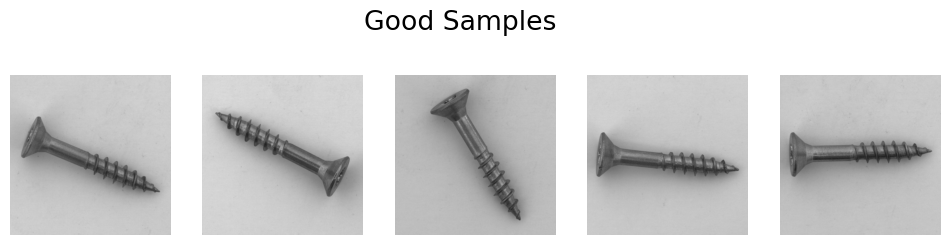

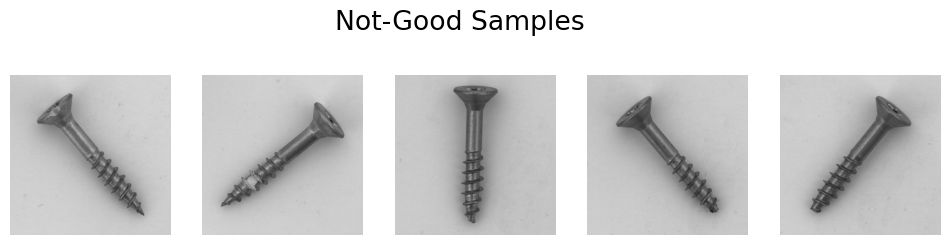

In [9]:
def show_samples(folder, title, n=5):
    imgs = list(folder.glob("*"))
    plt.figure(figsize=(12, 3))
    for i, path in enumerate(np.random.choice(imgs, n, replace=False)):
        img = cv2.imread(str(path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_samples(good_dir, "Good Samples")
show_samples(not_good_dir, "Not-Good Samples")

### Is the data sufficient to train a model?

Maybe it is a little unbalance. Let's check if the dimensions are consistent or if we need to do some "normalization".

In [10]:
def check_image_sizes(folders):
    sizes = {}
    unreadable = []
    total = 0
    for folder in folders:
        for p in folder.glob("**/*"):
            if not p.is_file():
                continue
            total += 1
            img = cv2.imread(str(p))
            if img is None:
                unreadable.append(str(p))
                continue
            h, w = img.shape[:2]
            ch = img.shape[2] if img.ndim == 3 else 1
            sizes.setdefault((h, w, ch), []).append(str(p))

    # summary
    print(f"Scanned {total} files, {sum(len(v) for v in sizes.values())} readable, {len(unreadable)} unreadable")
    size_counts = {k: len(v) for k, v in sizes.items()}
    for (h,w,ch), cnt in sorted(size_counts.items(), key=lambda x: -x[1]):
        print(f"  {h}x{w}x{ch}: {cnt} images")
    if len(size_counts) > 1:
        print("\nSizes are NOT all equal. Examples of differing files:")
        for (h,w,ch), paths in list(sizes.items())[:5]:
            print(f"  {h}x{w}x{ch}: {paths[:3]}{'...' if len(paths)>3 else ''}")
    else:
        print("\nAll readable images have the same size.")

    if unreadable:
        print("\nUnreadable files (first 10):")
        print("\n".join(unreadable[:10]))

    return sizes, unreadable

In [11]:
sizes, unreadable = check_image_sizes([good_dir, not_good_dir, test_dir])  # or [train_dir]

Scanned 480 files, 480 readable, 0 unreadable
  1024x1024x3: 480 images

All readable images have the same size.
